# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [12]:
base_dir = Path(r"C:\Users\Priscila\Desktop\EBAC - DATA SCIENCE\Desenvolvimento Modelos com Pandas e Python\Árvores II\Pratique II\input")
dataset_dir = base_dir / "UCI HAR Dataset"

print("base_dir:", base_dir)
print("dataset_dir existe?", dataset_dir.exists())

# se ainda não existir, cria os CSVs completos (com todas as variáveis)
if not (base_dir / "X_train.csv").exists():

    features = pd.read_csv(dataset_dir / "features.txt", sep=r"\s+", header=None, usecols=[1]).squeeze("columns")
    feature_names = features.tolist()

    # TRAIN
    subject_train = pd.read_csv(dataset_dir / "train" / "subject_train.txt", header=None).squeeze("columns")

    X_train = pd.read_csv(dataset_dir / "train" / "X_train.txt", sep=r"\s+", header=None)
    X_train.columns = feature_names
    X_train["subject"] = subject_train.to_numpy()

    X_train.index = pd.MultiIndex.from_arrays(
        [np.arange(len(X_train)), subject_train],
        names=["ordem", "sujeito"]
    )

    y_train = pd.read_csv(dataset_dir / "train" / "y_train.txt", header=None, names=["activity"])["activity"]
    y_train.index = X_train.index

    # TEST
    subject_test = pd.read_csv(dataset_dir / "test" / "subject_test.txt", header=None).squeeze("columns")

    X_test = pd.read_csv(dataset_dir / "test" / "X_test.txt", sep=r"\s+", header=None)
    X_test.columns = feature_names
    X_test["subject"] = subject_test.to_numpy()

    X_test.index = pd.MultiIndex.from_arrays(
        [np.arange(len(X_test)), subject_test],
        names=["ordem", "sujeito"]
    )

    y_test = pd.read_csv(dataset_dir / "test" / "y_test.txt", header=None, names=["activity"])["activity"]
    y_test.index = X_test.index

    # salvar CSVs completos (para a Tarefa 2)
    X_train.to_csv(base_dir / "X_train.csv")
    X_test.to_csv(base_dir / "X_test.csv")
    y_train.to_csv(base_dir / "y_train.csv")
    y_test.to_csv(base_dir / "y_test.csv")

# carregar os CSVs (lembrando do índice duplo)
X_train = pd.read_csv(base_dir / "X_train.csv", index_col=[0, 1])
X_test  = pd.read_csv(base_dir / "X_test.csv",  index_col=[0, 1])

y_train = pd.read_csv(base_dir / "y_train.csv", index_col=[0, 1]).squeeze("columns")
y_test  = pd.read_csv(base_dir / "y_test.csv",  index_col=[0, 1]).squeeze("columns")

display(X_train.head())
print("X_train (linhas, colunas):", X_train.shape)
print("X_test  (linhas, colunas):", X_test.shape)
print("y_train (linhas):", y_train.shape[0])
print("y_test  (linhas):", y_test.shape[0])


base_dir: C:\Users\Priscila\Desktop\EBAC - DATA SCIENCE\Desenvolvimento Modelos com Pandas e Python\Árvores II\Pratique II\input
dataset_dir existe? True


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
ordem,sujeito,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


X_train (linhas, colunas): (7352, 562)
X_test  (linhas, colunas): (2947, 562)
y_train (linhas): 7352
y_test  (linhas): 2947


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [7]:
# separar 25% do treino para validação
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

display(X_tr.head())
print("X_tr (linhas, colunas):", X_tr.shape)
print("X_val (linhas, colunas):", X_val.shape)
print("y_tr (linhas):", y_tr.shape[0])
print("y_val (linhas):", y_val.shape[0])


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
ordem,sujeito,,,,,,,,,,,,,,,,,,,,,
82,1,0.276240,-0.029638,-0.142616,-0.226577,0.164288,-0.122545,-0.239526,0.140287,-0.148617,-0.152773,...,0.046239,-0.269192,-0.072906,0.656842,-0.291200,0.077922,-0.763968,0.259629,0.041412,1
744,5,0.235876,-0.017576,-0.104603,-0.967568,-0.981815,-0.975531,-0.967194,-0.983754,-0.972701,-0.926171,...,-0.412366,-0.790417,-0.015060,0.015523,0.109895,-0.328089,0.621414,-0.848822,-0.143184,5
7208,30,0.280109,-0.017881,-0.111748,-0.998300,-0.996869,-0.996957,-0.998593,-0.996048,-0.996493,-0.941262,...,-0.314716,-0.568381,0.194656,-0.197896,-0.281663,0.009871,-0.235617,-0.236165,-0.373487,30
518,3,0.268124,-0.088038,-0.067815,-0.272255,0.126978,-0.303891,-0.303132,0.156323,-0.322939,-0.279845,...,-0.518520,-0.815189,-0.156655,-0.549587,0.639338,-0.379863,-0.581347,0.363248,0.132435,3
2868,15,0.217072,-0.006494,-0.154418,-0.071220,-0.086553,-0.160055,-0.151169,-0.069619,-0.128755,0.269441,...,-0.799122,-0.973474,0.527462,-0.693886,-0.739628,0.600305,-0.701446,0.293933,-0.048167,15


X_tr (linhas, colunas): (5514, 562)
X_val (linhas, colunas): (1838, 562)
y_tr (linhas): 5514
y_val (linhas): 1838


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_tr, y_tr)

importancias = clf.feature_importances_

# pegar as 3 mais importantes
idx_top3 = np.argsort(importancias)[::-1][:3]
top3_vars = X_tr.columns[idx_top3].tolist()

df_imp = pd.DataFrame({
    "variavel": X_tr.columns,
    "importancia": importancias
}).sort_values("importancia", ascending=False).reset_index(drop=True)

display(df_imp.head(10))
print("Top 3 variáveis:", top3_vars)


,variavel,importancia
0,tGravityAcc-min()-X,0.286326
1,fBodyAcc-mad()-X,0.257330
2,"angle(Y,gravityMean)",0.162623
3,tGravityAccMag-std(),0.136890
4,"tGravityAcc-arCoeff()-Z,2",0.118864
5,"tBodyGyro-correlation()-Y,Z",0.019418
6,tGravityAcc-max()-Y,0.012081
7,tBodyGyro-min()-X,0.006469
8,fBodyAccJerk-meanFreq()-X,0.000000
9,fBodyAccJerk-meanFreq()-Y,0.000000


Top 3 variáveis: ['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

,ccp_alpha,acc_train,acc_val
0,0.000009,0.904244,0.884657
1,0.000016,0.904244,0.884657
2,0.000053,0.904244,0.884657
3,0.000092,0.904244,0.884657
4,0.000174,0.903518,0.884657


Total de alphas usados: 17


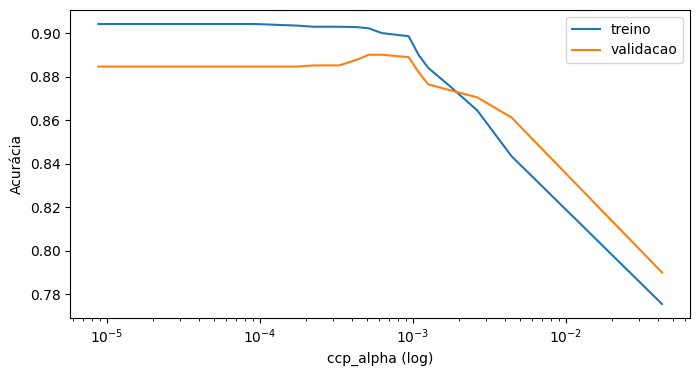

Melhor ccp_alpha: 0.0005175538100828376
Acurácia (treino): 0.9022488211824446
Acurácia (validação): 0.8900979325353645
CPU times: total: 594 ms
Wall time: 595 ms


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curren

In [13]:
%%time
top3_vars = ['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']

# se existir coluna "subject" além do índice, remove (pra não duplicar o "sujeito")
if "subject" in X_tr.columns:
    X_tr = X_tr.drop(columns=["subject"])
    X_val = X_val.drop(columns=["subject"])
    X_test = X_test.drop(columns=["subject"])

X_tr3  = X_tr[top3_vars].copy()
X_val3 = X_val[top3_vars].copy()
X_test3 = X_test[top3_vars].copy()

# caminho de poda (mesmo critério usado em aula)
base_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = base_tree.cost_complexity_pruning_path(X_tr3, y_tr)

ccp_alphas = np.unique(path.ccp_alphas[path.ccp_alphas > 0])
ccp_alphas_sub = ccp_alphas[::5]

arvores = []
acc_train = []
acc_val = []

for a in ccp_alphas_sub:
    clf = DecisionTreeClassifier(
        min_samples_leaf=20,
        random_state=42,
        ccp_alpha=float(a)
    )
    clf.fit(X_tr3, y_tr)
    arvores.append(clf)

    acc_train.append(accuracy_score(y_tr, clf.predict(X_tr3)))
    acc_val.append(accuracy_score(y_val, clf.predict(X_val3)))

df_acc = pd.DataFrame({
    "ccp_alpha": ccp_alphas_sub.astype(float),
    "acc_train": acc_train,
    "acc_val": acc_val
}).sort_values("ccp_alpha").reset_index(drop=True)

display(df_acc.head())
print("Total de alphas usados:", df_acc.shape[0])

plt.figure(figsize=(8,4))
plt.plot(df_acc["ccp_alpha"], df_acc["acc_train"], label="treino")
plt.plot(df_acc["ccp_alpha"], df_acc["acc_val"], label="validacao")
plt.xscale("log")
plt.xlabel("ccp_alpha (log)")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

idx_best = df_acc["acc_val"].idxmax()
best_alpha = df_acc.loc[idx_best, "ccp_alpha"]
best_acc_val = df_acc.loc[idx_best, "acc_val"]
best_acc_train = df_acc.loc[idx_best, "acc_train"]

print("Melhor ccp_alpha:", best_alpha)
print("Acurácia (treino):", best_acc_train)
print("Acurácia (validação):", best_acc_val)

# treinar modelo final no treino+val com o melhor alpha
X_tv3 = pd.concat([X_tr3, X_val3])
y_tv = pd.concat([y_tr, y_val])

best_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, ccp_alpha=float(best_alpha))
best_tree.fit(X_tv3, y_tv)


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia no teste: 0.7298948082796064


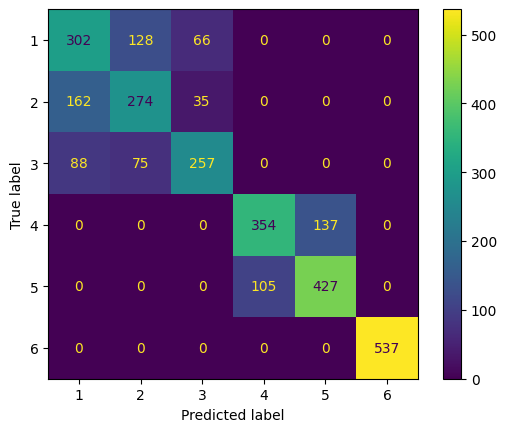

In [15]:
# usar as mesmas 3 variáveis no teste
X_test3 = X_test[top3_vars].copy()

y_pred_test = best_tree.predict(X_test3)
acc_test = accuracy_score(y_test, y_pred_test)

print("Acurácia no teste:", acc_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
